In [418]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [419]:
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

['/usr/share/fonts/truetype/ubuntu/UbuntuMono-B.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-LI.ttf',
 '/usr/share/fonts/truetype/ubuntu/UbuntuMono-RI.ttf',
 '/usr/share/fonts/truetype/ubuntu/UbuntuMono-BI.ttf',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-B.ttf',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-Th.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-L.ttf',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-R.ttf',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-C.ttf',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-BI.ttf',
 '/usr/share/fonts/truetype/ubuntu/UbuntuMono-R.ttf',
 '/usr/share/fonts/truetype/palatino/Palatino Normal.ttf',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-MI.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf',
 '/usr/share/fonts/truetype/ubuntu/

In [420]:
from solvers import util
import matplotlib.font_manager

In [421]:
# flist = matplotlib.font_manager.get_fontconfig_fonts()
# names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
# names

#### We start by analyzing the comparison of computation times between DP-ILQR, regular consensus ADMM, and potential ADMM:

In [422]:
drones_3_8_combined= pd.read_excel('logs/ADMM_mpc_3_to_8_agents.xlsm', sheet_name='Sheet1')

In [423]:
drones_3_8_combined.columns

Index(['i_trial', ' n_agents', ' t', ' converged', ' obj_trj', 'T', 'dt',
       'radius', '         SOVA_admm ', 't_solve_avg', ' t_solve_std',
       ' MAX_ITER', ' dist_to_goal'],
      dtype='object')

In [424]:
drones_3_8_combined.columns = ['i_trial','n_agents','t','converged','obj_trj','T','dt','radius','SOVA_admm','t_solve_avg','t_solve_std','MAX_ITER','dist_to_goal']

In [425]:
drones_3_8_combined = drones_3_8_combined.loc[drones_3_8_combined['converged']==True]

In [426]:
drones_3_8_combined = drones_3_8_combined.replace(to_replace='None', value=np.nan).dropna()

In [427]:
drones_3_8_combined = drones_3_8_combined.dropna()

In [428]:
drones_3_8_combined.columns

Index(['i_trial', 'n_agents', 't', 'converged', 'obj_trj', 'T', 'dt', 'radius',
       'SOVA_admm', 't_solve_avg', 't_solve_std', 'MAX_ITER', 'dist_to_goal'],
      dtype='object')

In [429]:
drones_3_8_combined['normalized_t_solve'] = drones_3_8_combined['t_solve_avg']/drones_3_8_combined['obj_trj']

In [430]:
drones_3_8_combined['normalized_t_std'] = drones_3_8_combined['t_solve_std']/drones_3_8_combined['obj_trj']

In [431]:
dpilqr_3_to_8_agents = pd.read_excel('logs/dpilqr_3_to_8.xlsm', sheet_name='Sheet1')

In [432]:
dpilqr_3_to_8_agents.columns

Index(['dynamics', 'n_agents', 'i_trial', 'centralized', 'last', 't', 'J',
       'horizon', 'dt', 'converged', 'ids', 't_solve_avg', 't_solve_std',
       'subgraphs', 'dist_left'],
      dtype='object')

In [433]:
dpilqr_3_to_8_agents.drop(columns=['dynamics','last','ids','subgraphs'],inplace=True)

In [434]:
dpilqr_3_to_8_agents.columns = ['n_agents', 'i_trial', 'SOVA_admm', 't','obj_trj', 'T', 'dt', 'converged','t_solve_avg', 't_solve_std', 'dist_to_goal']

In [435]:
dpilqr_3_to_8_agents['normalized_t_solve'] = dpilqr_3_to_8_agents['t_solve_avg']/dpilqr_3_to_8_agents['obj_trj']


In [436]:
dpilqr_3_to_8_agents['normalized_t_std'] = dpilqr_3_to_8_agents['t_solve_std']/dpilqr_3_to_8_agents['obj_trj']

In [437]:
dpilqr_3_to_8_agents.head()

,n_agents,i_trial,SOVA_admm,t,obj_trj,T,dt,converged,t_solve_avg,t_solve_std,dist_to_goal,normalized_t_solve,normalized_t_std
0,3,0,False,1.3,828.167463,8,0.1,True,0.018375,0.003508,"[0.06809967102056529, 0.08392775736397566, 0.0...",0.000022,4.235851e-06
1,3,1,False,1.4,1247.440727,8,0.1,True,0.019545,0.001119,"[0.08209382373905584, 0.027239258113921368, 0....",0.000016,8.973174e-07
2,3,2,False,1.7,1800.550330,8,0.1,True,0.080149,0.007683,"[0.09771915630264676, 0.07990022619853404, 0.0...",0.000045,4.267041e-06
3,3,3,False,1.2,875.209328,8,0.1,True,0.037942,0.003617,"[0.027404585265289782, 0.057506596816226156, 0...",0.000043,4.133216e-06
4,3,4,False,1.1,802.755533,8,0.1,True,0.031827,0.004204,"[0.023639860153240266, 0.05510405304572813, 0....",0.000040,5.236896e-06


In [438]:
dpilqr_3_to_8_agents['SOVA_admm']='ilqr'

In [439]:
dpilqr_admm_df = pd.concat((dpilqr_3_to_8_agents,drones_3_8_combined),ignore_index=True)

In [440]:
dpilqr_admm_df.columns

Index(['n_agents', 'i_trial', 'SOVA_admm', 't', 'obj_trj', 'T', 'dt',
       'converged', 't_solve_avg', 't_solve_std', 'dist_to_goal',
       'normalized_t_solve', 'normalized_t_std', 'radius', 'MAX_ITER'],
      dtype='object')

In [441]:
import matplotlib.ticker as ticker
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager
font_family = 'Palatino LT'

findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Fon

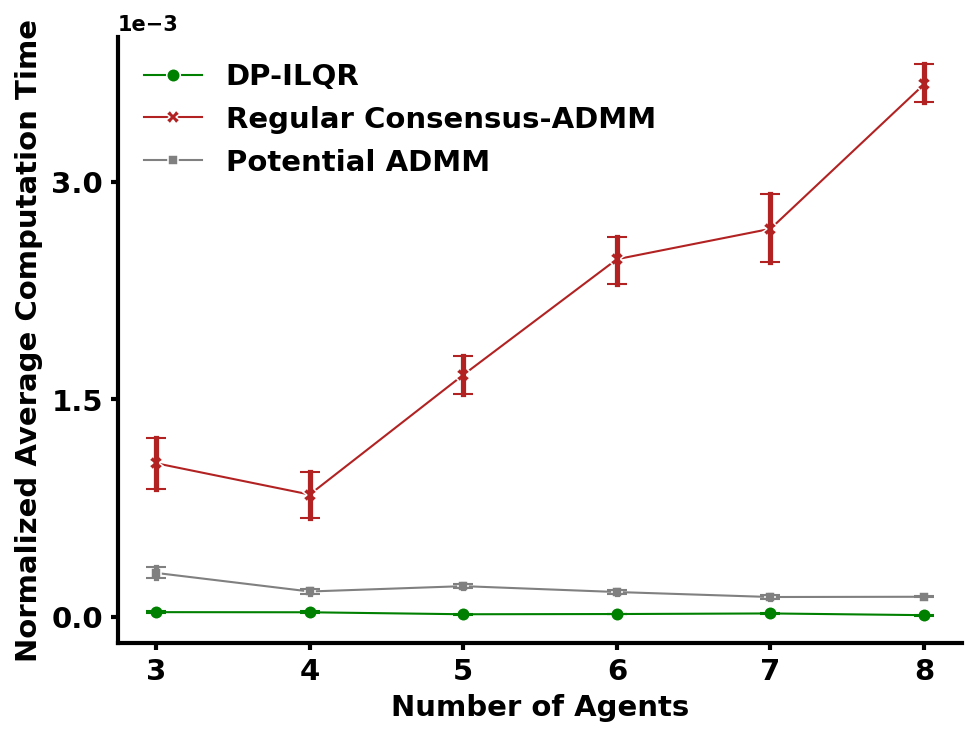

In [442]:
plt.figure(dpi=150)
err_kws = {'capsize': 5, 'capthick': 1, 'elinewidth': 2.5}
ax = sns.lineplot(data=dpilqr_admm_df, x="n_agents", y="normalized_t_solve", hue='SOVA_admm', lw=1.0, style='SOVA_admm',
                  dashes=False, markers=True, markersize=6.5, palette=["green", "firebrick", "grey"], err_style='bars', err_kws=err_kws)

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(width=2.0)

plt.xticks(fontname = font_family, size=14, weight='bold')
plt.yticks(fontname = font_family,size=14, weight='bold')

plt.ylabel('Normalized Average Computation Time', fontname = font_family,fontsize=14, weight='bold')
plt.xlabel('Number of Agents', fontname = font_family, fontsize=14, weight='bold')
plt.legend(labels=['DP-ILQR', 'Regular Consensus-ADMM', 'Potential ADMM'], frameon=False, \
           prop={'family':font_family,'weight': 'bold', 'size': 14})

# Set y-axis to scientific notation style with fewer ticks
ax.yaxis.get_major_formatter().set_powerlimits((-2, 2))
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
font = FontProperties(family=font_family,weight='bold')
ax.yaxis.get_offset_text().set_font_properties(font)
# plt.savefig('results/avg_computation_times_comparison.png', bbox_inches = 'tight', dpi=250, facecolor = ax.get_facecolor())

findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Fon

findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Fon

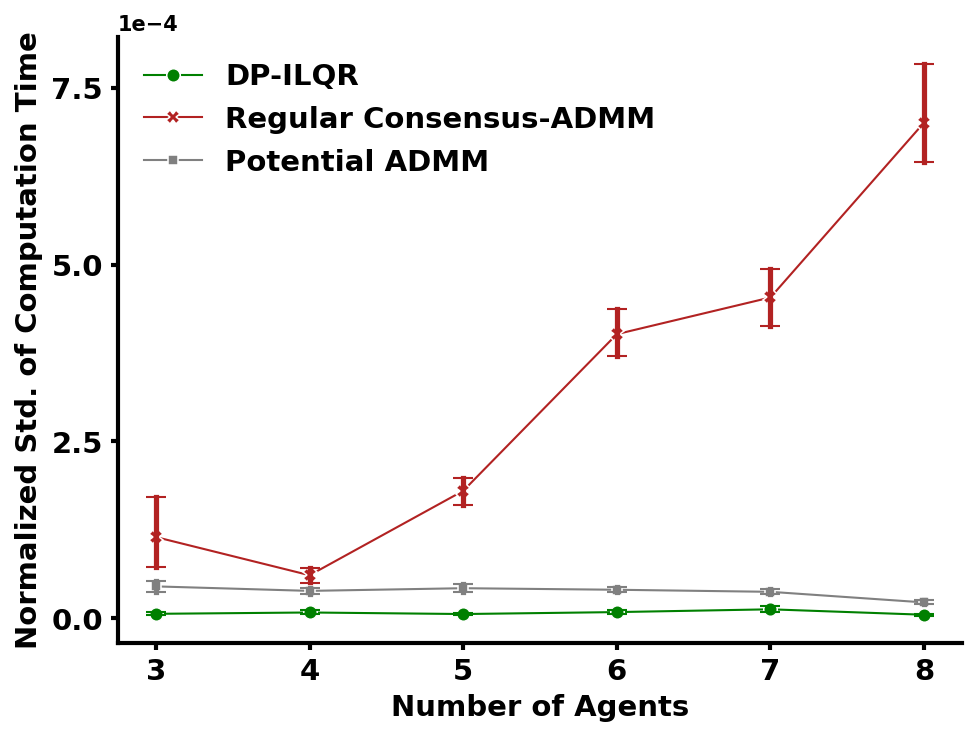

In [443]:
plt.figure(dpi=150)
err_kws = {'capsize': 5, 'capthick':1, 'elinewidth':2.5}
ax = sns.lineplot(data=dpilqr_admm_df, x="n_agents", y="normalized_t_std", hue='SOVA_admm', lw=1.0, style='SOVA_admm',
             dashes=False, markers=True, markersize=6.5,palette=["green", "firebrick", "grey"], err_style='bars', err_kws = err_kws)


for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.0)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(width=2.0)

plt.xticks(fontname = font_family, size=14, weight='bold')
plt.yticks(fontname = font_family,size=14, weight='bold')
# ax.set_xlabel(ax.get_xlabel(), fontsize=12, weight='bold')
# ax.set_ylabel(ax.get_ylabel(), fontsize=12, weight='bold')
plt.ylabel('Normalized Std. of Computation Time',fontname = font_family,fontsize=14, weight='bold');
plt.xlabel('Number of Agents',fontname = font_family,fontsize=14, weight='bold');
plt.legend(labels=['DP-ILQR','Regular Consensus-ADMM','Potential ADMM'],frameon=False,\
           prop={'family':font_family,'weight':'bold','size':14})

# Set y-axis to scientific notation style with fewer ticks
ax.yaxis.get_major_formatter().set_powerlimits((-2, 2))
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
font = FontProperties(family=font_family,weight='bold')
ax.yaxis.get_offset_text().set_font_properties(font)

plt.savefig('results/std_computation_times_comparison.png', bbox_inches = 'tight', dpi=250, facecolor = ax.get_facecolor())


#### The following optimality gap analysis uses data where each scenario is run 60 trials:

In [444]:
optimality_60trials = pd.read_excel('logs/optimality_gap_60Trials.xlsm', sheet_name='optimality_gap_60Trials')

In [445]:
optimality_60trials.columns = ['i_trial', 'n_agents', 't', 'converged', 'obj_trj', 'T', 'dt',
       'radius', 'SOVA_admm', 't_solve_avg', 't_solve_std',
       'MAX_ITER', 'dist_to_goal']

In [446]:
optimality_60trials.head()

,i_trial,n_agents,t,converged,obj_trj,T,dt,radius,SOVA_admm,t_solve_avg,t_solve_std,MAX_ITER,dist_to_goal
0,0,3,1.2,True,618.599116,8,0.1,0.2,centralized_mpc,0.423846,0.105043,3,[0.08 0.055 0.093]
1,0,3,1.2,True,652.274774,8,0.1,0.2,True,0.463307,0.046052,3,[0.084 0.051 0.049]
2,1,3,1.0,True,411.398870,8,0.1,0.2,centralized_mpc,0.327532,0.009642,3,[0.04 0.081 0.074]
3,1,3,1.0,True,418.837521,8,0.1,0.2,True,0.434283,0.023814,3,[0.043 0.087 0.08 ]
4,2,3,1.2,True,561.208497,8,0.1,0.2,centralized_mpc,0.335040,0.016040,3,[0.046 0.076 0.088]


In [447]:
agents_3_60trials =np.abs(optimality_60trials[(optimality_60trials['n_agents']==3) & (optimality_60trials['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_60trials[(optimality_60trials['n_agents']==3) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_60trials[(optimality_60trials['n_agents']==3) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [448]:
agents_4_60trials =np.abs(optimality_60trials[(optimality_60trials['n_agents']==4) & (optimality_60trials['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_60trials[(optimality_60trials['n_agents']==4) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_60trials[(optimality_60trials['n_agents']==4) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [449]:
agents_5_60trials =np.abs(optimality_60trials[(optimality_60trials['n_agents']==5) & (optimality_60trials['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_60trials[(optimality_60trials['n_agents']==5) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_60trials[(optimality_60trials['n_agents']==5) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [450]:
agents_6_60trials =np.abs(optimality_60trials[(optimality_60trials['n_agents']==6) & (optimality_60trials['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_60trials[(optimality_60trials['n_agents']==6) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_60trials[(optimality_60trials['n_agents']==6) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [451]:
agents_7_60trials =np.abs(optimality_60trials[(optimality_60trials['n_agents']==7) & (optimality_60trials['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_60trials[(optimality_60trials['n_agents']==7) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_60trials[(optimality_60trials['n_agents']==7) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [452]:
agents_8_60trials =np.abs(optimality_60trials[(optimality_60trials['n_agents']==8) & (optimality_60trials['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_60trials[(optimality_60trials['n_agents']==8) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_60trials[(optimality_60trials['n_agents']==8) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [453]:
def reject_outliers_2(data, m=2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d / (mdev if mdev else 1.)
    return data[s < m]

In [454]:
#Remove outliers using the median and "median absolute distance to the median."
agents_3_60trials = reject_outliers_2(agents_3_60trials, m=1.5)
agents_4_60trials = reject_outliers_2(agents_4_60trials, m=1.5)
agents_5_60trials = reject_outliers_2(agents_5_60trials, m=1.5)
agents_6_60trials = reject_outliers_2(agents_6_60trials, m=1.5)
agents_7_60trials = reject_outliers_2(agents_7_60trials, m=1.5)
agents_8_60trials = reject_outliers_2(agents_8_60trials, m=1.5)



In [455]:
relative_gap_admm = np.hstack((agents_3_60trials ,agents_4_60trials ,agents_5_60trials ,
                               agents_6_60trials ,agents_7_60trials ,agents_8_60trials ))

In [456]:
n_agents = np.hstack(([3]*agents_3_60trials.size,
                      [4]*agents_4_60trials.size, 
                      [5]*agents_5_60trials.size, 
                      [6]*agents_6_60trials.size, 
                      [7]*agents_7_60trials.size, 
                      [8]*agents_8_60trials.size))

In [457]:
optimality_new_df = pd.DataFrame({'n_agents':n_agents.flatten(),
                                  'relative_gap_admm':relative_gap_admm.flatten()})

In [458]:
optimality_new_df['relative_gap_admm'] = optimality_new_df['relative_gap_admm']*100

In [459]:
optimality_stats = optimality_new_df.groupby('n_agents').agg({'relative_gap_admm':['mean','std']})
optimality_stats.columns = ['mean %','std %']
optimality_stats = optimality_stats.reset_index()
optimality_stats

,n_agents,mean %,std %
0,3,0.862002,0.153643
1,4,0.819996,0.411973
2,5,2.694291,1.820282
3,6,3.571168,2.651489
4,7,5.204225,3.314343
5,8,7.649426,4.117975


findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Fon

<Figure size 960x720 with 0 Axes>

findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Fon

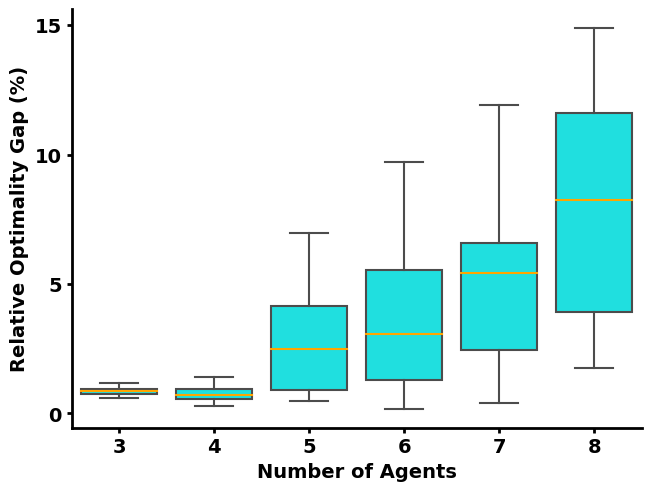

In [460]:
plt.figure(dpi=150)  # Increase dpi for better resolution (adjust as needed)
fig, ax = plt.subplots()
sns.boxplot(x='n_agents', y='relative_gap_admm', data=optimality_new_df, ax=ax, color="cyan", showfliers=False,
            medianprops={'color': 'orange','linewidth':1.5})
sns.despine(right=True)

# Increase linewidth of bottom and left spines
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Increase tick width
ax.tick_params(width=2.0)

# Increase label and tick font sizes
plt.xticks(fontname = font_family, size=14, weight='bold')
plt.yticks(fontname = font_family,size=14, weight='bold')

plt.ylabel('Relative Optimality Gap (%)', fontname = font_family, fontsize=14, weight='bold')
plt.xlabel('Number of Agents', fontname = font_family, fontsize=14, weight='bold')

ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
# Add a legend if necessary
# plt.legend(labels=['Potential ADMM optimality gap'], frameon=False, prop={'weight': 'bold', 'size': 8}, loc='best')

plt.savefig('results/potential_admm_optimality_gap.png', bbox_inches='tight', dpi=250, facecolor=ax.get_facecolor())

# Show the plot (optional)
plt.show()

#### Relative optimality gap between DP-ILQR and centralized MPC baseline:

In [701]:
dpilqr_df = pd.read_excel('logs/ilqr_vs_centralized.xlsm', sheet_name='ilqr_vs_centralized')

In [702]:
dpilqr_df.columns

Index(['i_trial', ' n_agents', ' t', ' converged', ' obj_trj', 'T', 'dt',
       'radius', '         SOVA_admm '],
      dtype='object')

In [703]:
dpilqr_df.columns = ['i_trial', 'n_agents', 't', 'converged', 'obj_trj', 'T', 'dt',
       'radius', 'SOVA_admm']

In [704]:
agents_3_60trials_sova =(dpilqr_df[(dpilqr_df['n_agents']==3) & (dpilqr_df['SOVA_admm']==True)]['obj_trj'].values-\
                dpilqr_df[(dpilqr_df['n_agents']==3) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/dpilqr_df[(dpilqr_df['n_agents']==3) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [705]:
agents_3_60trials_ilqr =(dpilqr_df[(dpilqr_df['n_agents']==3) & (dpilqr_df['SOVA_admm']=='ilqr')]['obj_trj'].values-\
                dpilqr_df[(dpilqr_df['n_agents']==3) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/dpilqr_df[(dpilqr_df['n_agents']==3) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [706]:
agents_4_60trials_sova =(dpilqr_df[(dpilqr_df['n_agents']==4) & (dpilqr_df['SOVA_admm']==True)]['obj_trj'].values-\
                dpilqr_df[(dpilqr_df['n_agents']==4) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/dpilqr_df[(dpilqr_df['n_agents']==4) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

agents_4_60trials_ilqr =(dpilqr_df[(dpilqr_df['n_agents']==4) & (dpilqr_df['SOVA_admm']=='ilqr')]['obj_trj'].values-\
                dpilqr_df[(dpilqr_df['n_agents']==4) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/dpilqr_df[(dpilqr_df['n_agents']==4) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [707]:
agents_5_60trials_sova =(dpilqr_df[(dpilqr_df['n_agents']==5) & (dpilqr_df['SOVA_admm']==True)]['obj_trj'].values-\
                dpilqr_df[(dpilqr_df['n_agents']==5) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/dpilqr_df[(dpilqr_df['n_agents']==5) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

agents_5_60trials_ilqr =(dpilqr_df[(dpilqr_df['n_agents']==5) & (dpilqr_df['SOVA_admm']=='ilqr')]['obj_trj'].values-\
                dpilqr_df[(dpilqr_df['n_agents']==5) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/dpilqr_df[(dpilqr_df['n_agents']==5) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [708]:
agents_6_60trials_sova =(dpilqr_df[(dpilqr_df['n_agents']==6) & (dpilqr_df['SOVA_admm']==True)]['obj_trj'].values-\
                dpilqr_df[(dpilqr_df['n_agents']==6) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/dpilqr_df[(dpilqr_df['n_agents']==6) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

agents_6_60trials_ilqr =(dpilqr_df[(dpilqr_df['n_agents']==6) & (dpilqr_df['SOVA_admm']=='ilqr')]['obj_trj'].values-\
                dpilqr_df[(dpilqr_df['n_agents']==6) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/dpilqr_df[(dpilqr_df['n_agents']==6) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [709]:
agents_7_60trials_sova =(dpilqr_df[(dpilqr_df['n_agents']==7) & (dpilqr_df['SOVA_admm']==True)]['obj_trj'].values-\
                dpilqr_df[(dpilqr_df['n_agents']==7) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/dpilqr_df[(dpilqr_df['n_agents']==7) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

agents_7_60trials_ilqr =(dpilqr_df[(dpilqr_df['n_agents']==7) & (dpilqr_df['SOVA_admm']=='ilqr')]['obj_trj'].values-\
                dpilqr_df[(dpilqr_df['n_agents']==7) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/dpilqr_df[(dpilqr_df['n_agents']==7) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [710]:
agents_8_60trials_sova =(dpilqr_df[(dpilqr_df['n_agents']==8) & (dpilqr_df['SOVA_admm']==True)]['obj_trj'].values-\
                dpilqr_df[(dpilqr_df['n_agents']==8) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/dpilqr_df[(dpilqr_df['n_agents']==8) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

agents_8_60trials_ilqr =(dpilqr_df[(dpilqr_df['n_agents']==8) & (dpilqr_df['SOVA_admm']=='ilqr')]['obj_trj'].values-\
                dpilqr_df[(dpilqr_df['n_agents']==8) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/dpilqr_df[(dpilqr_df['n_agents']==8) & (dpilqr_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [711]:
agents_3_60trials_ilqr = agents_3_60trials_ilqr[agents_3_60trials_ilqr >= 0]
agents_4_60trials_ilqr = agents_4_60trials_ilqr[agents_4_60trials_ilqr >= 0]
agents_5_60trials_ilqr = agents_5_60trials_ilqr[agents_5_60trials_ilqr >= 0]
agents_6_60trials_ilqr = agents_6_60trials_ilqr[agents_6_60trials_ilqr >= 0]
agents_7_60trials_ilqr = agents_7_60trials_ilqr[agents_7_60trials_ilqr >= 0]
agents_8_60trials_ilqr = agents_8_60trials_ilqr[agents_8_60trials_ilqr >= 0]


In [712]:
agents_3_60trials_sova = agents_3_60trials_sova[agents_3_60trials_sova >= 0]
agents_4_60trials_sova = agents_4_60trials_sova[agents_4_60trials_sova >= 0]
agents_5_60trials_sova = agents_5_60trials_sova[agents_5_60trials_sova >= 0]
agents_6_60trials_sova = agents_6_60trials_sova[agents_6_60trials_sova >= 0]
agents_7_60trials_sova = agents_7_60trials_sova[agents_7_60trials_sova >= 0]
agents_8_60trials_sova = agents_8_60trials_sova[agents_8_60trials_sova >= 0]

In [713]:
# agents_3_60trials_sova = reject_outliers_2(agents_3_60trials_sova, m=1.5)
# agents_4_60trials_sova = reject_outliers_2(agents_4_60trials_sova, m=1.5)
# agents_5_60trials_sova = reject_outliers_2(agents_5_60trials_sova, m=1.5)
# agents_6_60trials_sova = reject_outliers_2(agents_6_60trials_sova, m=1.5)
# agents_7_60trials_sova = reject_outliers_2(agents_7_60trials_sova, m=1.5)
# agents_8_60trials_sova = reject_outliers_2(agents_8_60trials_sova, m=1.5)

In [714]:
# agents_3_60trials_ilqr = reject_outliers_2(agents_3_60trials_ilqr, m=2)
# agents_4_60trials_ilqr = reject_outliers_2(agents_4_60trials_ilqr, m=2)
# agents_5_60trials_ilqr = reject_outliers_2(agents_5_60trials_ilqr, m=2)
# agents_6_60trials_ilqr = reject_outliers_2(agents_6_60trials_ilqr, m=2)
# agents_7_60trials_ilqr = reject_outliers_2(agents_7_60trials_ilqr, m=2)
# agents_8_60trials_ilqr = reject_outliers_2(agents_8_60trials_ilqr, m=2)

In [715]:
relative_gap_admm = np.hstack((agents_3_60trials_sova ,agents_4_60trials_sova ,agents_5_60trials_sova ,
                               agents_6_60trials_sova ,agents_7_60trials_sova ,agents_8_60trials_sova ,
                               agents_3_60trials_ilqr ,agents_4_60trials_ilqr ,agents_5_60trials_ilqr ,
                               agents_6_60trials_ilqr ,agents_7_60trials_ilqr ,agents_8_60trials_ilqr))*100

In [716]:
n_agents = np.hstack(([3]*agents_3_60trials_sova.size,
                      [4]*agents_4_60trials_sova.size, 
                      [5]*agents_5_60trials_sova.size, 
                      [6]*agents_6_60trials_sova.size, 
                      [7]*agents_7_60trials_sova.size, 
                      [8]*agents_8_60trials_sova.size,
                      [3]*agents_3_60trials_ilqr.size,
                      [4]*agents_4_60trials_ilqr.size, 
                      [5]*agents_5_60trials_ilqr.size, 
                      [6]*agents_6_60trials_ilqr.size, 
                      [7]*agents_7_60trials_ilqr.size, 
                      [8]*agents_8_60trials_ilqr.size
                      ))

In [717]:
sova_counts = agents_3_60trials_sova.size + agents_4_60trials_sova.size+\
                agents_5_60trials_sova.size + agents_6_60trials_sova.size+\
                  agents_7_60trials_sova.size +   agents_8_60trials_sova.size

In [718]:
sova_counts 

307

In [719]:
ilqr_counts = n_agents.size - sova_counts

In [720]:
ilqr_counts

200

In [721]:
method = np.hstack((['SOVA']*sova_counts,['ilqr']*ilqr_counts))

In [722]:
ilqr_df = pd.DataFrame({'n_agents':n_agents,'relative_gap_admm':relative_gap_admm,'method':method})

In [723]:
optimality_combined_df = ilqr_df

In [724]:
optimality_combined_df.columns

Index(['n_agents', 'relative_gap_admm', 'method'], dtype='object')

In [725]:
font_family

'Palatino LT'

<Figure size 960x720 with 0 Axes>

findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Fon

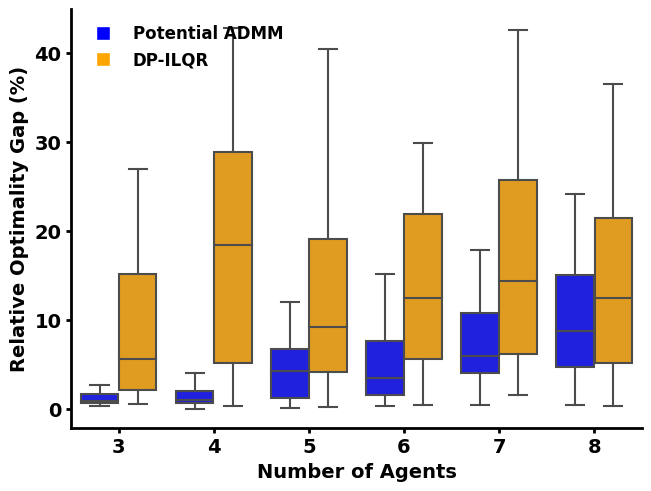

In [732]:
# Create a color palette for the two methods
colors = ['blue', 'orange']

plt.figure(dpi=150)
fig, ax = plt.subplots()

# Explicitly set colors for each method
sns.boxplot(x='n_agents', y='relative_gap_admm', data=optimality_combined_df, ax=ax, hue='method',
            palette=colors, showfliers=False)
sns.despine(right=True)

# Increase linewidth of bottom and left spines
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Increase tick width
ax.tick_params(width=2.0)

# Increase label and tick font sizes
plt.xticks(fontname=font_family, size=14, weight='bold')
plt.yticks(fontname=font_family, size=14, weight='bold')

plt.ylabel('Relative Optimality Gap (%)', fontname=font_family, fontsize=14, weight='bold')
plt.xlabel('Number of Agents', fontname=font_family, fontsize=14, weight='bold')

ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))

# Create a custom legend with boxes
legend_labels = ['Potential ADMM', 'DP-ILQR']
handles = [plt.Line2D([0], [0], marker='s', color='w', label=label, markerfacecolor=color, markersize=10)
           for label, color in zip(legend_labels, colors)]
plt.legend(loc='upper left',handles=handles, frameon=False, prop={'family': font_family, 'weight': 'bold', 'size': 12})

# Show the plot (optional)
plt.show()

In [733]:
optimality_stats = optimality_combined_df.groupby(['n_agents','method']).agg({'relative_gap_admm':['mean','std']})
optimality_stats.columns = ['mean %','std %']
optimality_stats = optimality_stats.reset_index()
optimality_stats

,n_agents,method,mean %,std %
0,3,SOVA,2.200801,3.973997
1,3,ilqr,13.131487,17.202176
2,4,SOVA,1.779774,1.762729
3,4,ilqr,19.821043,19.187270
4,5,SOVA,5.037403,4.946410
5,5,ilqr,15.124626,17.128788
6,6,SOVA,6.354908,7.515514
7,6,ilqr,28.671215,80.376557
8,7,SOVA,8.108640,6.860123
9,7,ilqr,23.753049,36.171639
